In [18]:
#Import libraries for Adaline implementation
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
#Loading in the Data
file_path = r"C:\Users\strou\Desktop\Machine Learning\Project 1\Data\project_adult.csv"
file_path_valid  = r"C:\Users\strou\Desktop\Machine Learning\Project 1\Data\project_validation_inputs.csv"

df = pd.read_csv(file_path, na_values='?')
df_valid = pd.read_csv(file_path_valid, na_values='?')

In [20]:
#Define a Function to Preprocess the Data
def preprocess_data(df):

  #Change income to a binary variable
  if 'income' in df.columns:
    df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

  #Get rid of education because it's the same as education num but not ordinal

  #drop na
  df = df.dropna()

  # Select categorical columns (object or category types)
  categorical_cols = df.select_dtypes(include=['object', 'category']).columns

  # Initialize encoder
  le = LabelEncoder()

  # Apply LabelEncoder to each categorical column in place
  for col in categorical_cols:
      df[col] = le.fit_transform(df[col])

  return df

In [21]:
#Actually preprocess data
df = preprocess_data(df)
df_valid = preprocess_data(df_valid)

C:\Users\strou\AppData\Local\Temp\ipykernel_35636\2056822723.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\strou\AppData\Local\Temp\ipykernel_35636\2056822723.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\strou\AppData\Local\Temp\ipykernel_35636\2056822723.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [22]:
# split data into training and test datasets
train = df.drop('income', axis=1) # Features are all columns except 'Unnamed: 0' and 'income'
X = train
y = df['income'] # Target is the 'income' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled can be used for training and testing models
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
## #Create Necessary functions and clasases for testing Adaline model
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    

#Confustion Matrix Function
def plot_confusion_matrix(cm, y_true):
    """
    Plots the confusion matrix using a heatmap.

    Args:
        cm (np.ndarray): The confusion matrix.
        y_true (np.ndarray): The true labels for the test data.
    """
    # Create the plot using pure matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))

    # Use imshow to create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the unique class names
           xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

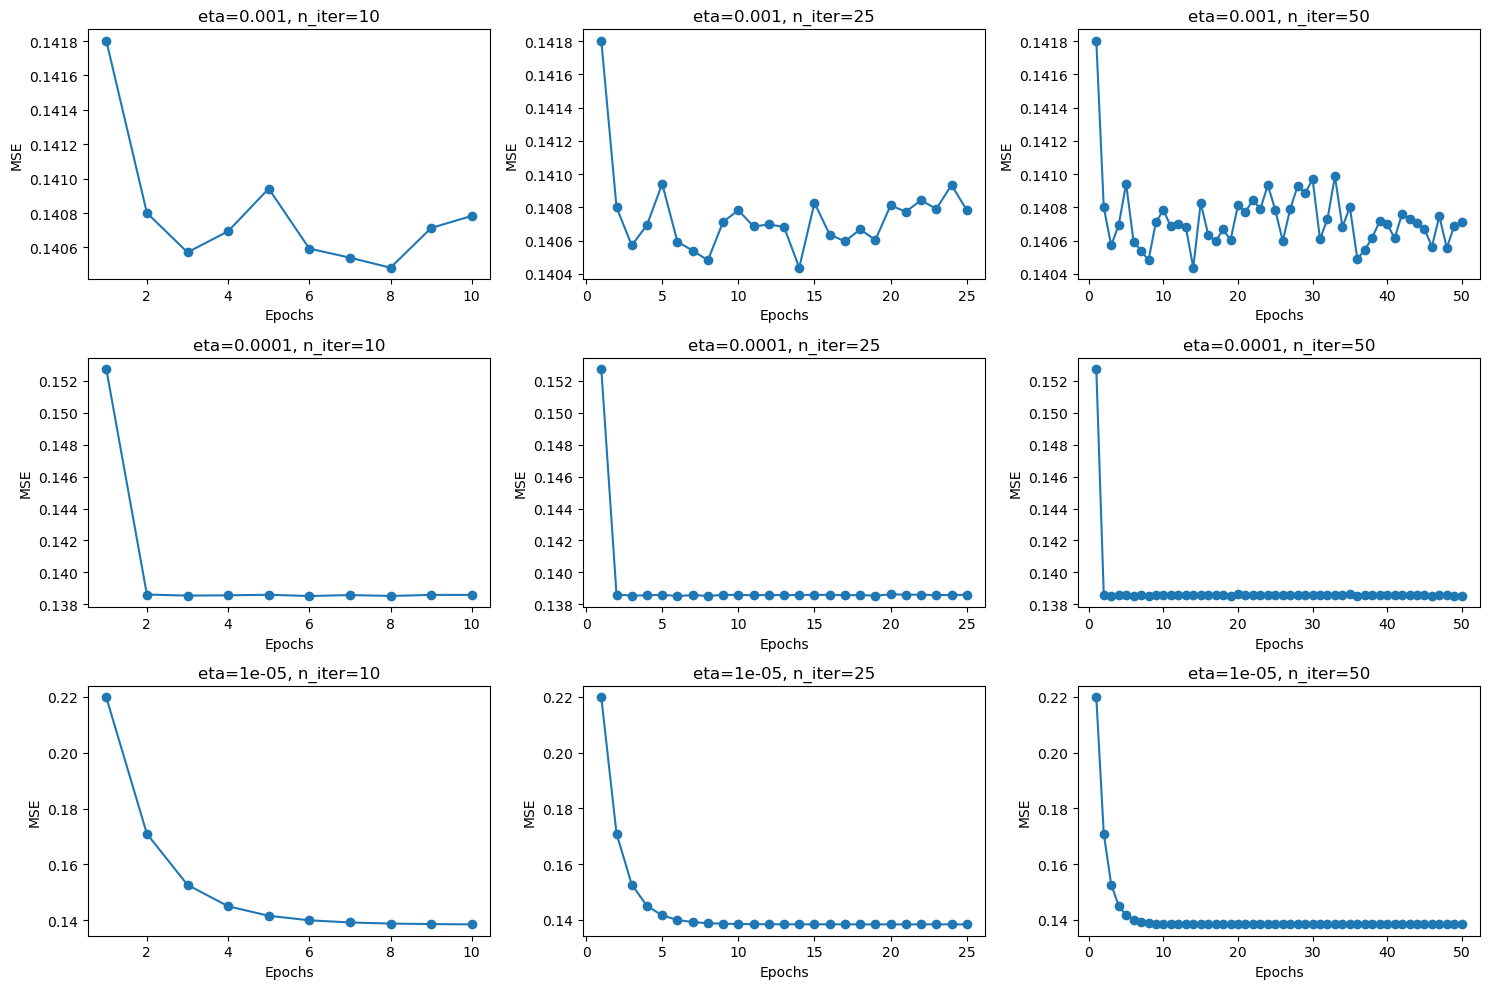

In [25]:
#Loop over different iterations of the Adaline model with different learnidng rates and number of iterations
etas = [0.001, 0.0001, 0.00001]
n_iters = [10, 25, 50]

fig, ax = plt.subplots(len(etas), len(n_iters), figsize=(15, 10), squeeze=False)

for row, eta in enumerate(etas):
    for col, n_iter in enumerate(n_iters):
        ada = AdalineSGD(n_iter=n_iter, eta=eta, random_state=1).fit(X_train_scaled.values, y_train.values)
        ax[row, col].plot(range(1, n_iter + 1), ada.losses_, marker='o')
        ax[row, col].set_xlabel('Epochs')
        ax[row, col].set_ylabel('MSE')
        ax[row, col].set_title(f'eta={eta}, n_iter={n_iter}')

plt.tight_layout()
plt.show()

In [26]:
#The model seems to fully converge around the 15th iteration with a 1e-5 learning rate, 
# so we'll be calling that our "best" hand coded model, and compare it to the scikit learn result. 
# At 1e-4 learning rate, the MSE jumps around too much to be as accurate as we'd like it to be.

In [27]:
#Generating the Best Adaline Model
best_ada = AdalineSGD(n_iter=15, eta=1e-5, random_state=1).fit(X_train_scaled.values, y_train.values)
y_pred = best_ada.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test.values, y_pred):.4f}")


Accuracy: 0.8048



--- Manual Confusion Matrix ---


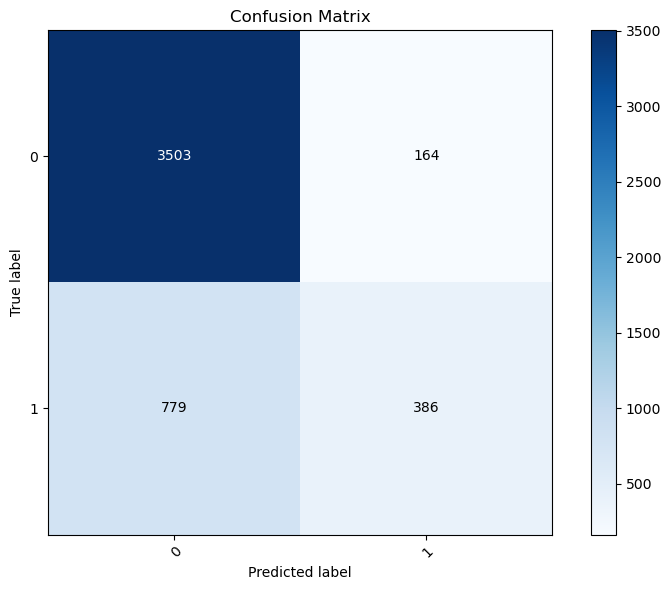


--- Manual Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      3667
           1       0.70      0.33      0.45      1165

    accuracy                           0.80      4832
   macro avg       0.76      0.64      0.67      4832
weighted avg       0.79      0.80      0.78      4832



In [28]:
# Generate and display the confusion matrix and classification report
print("\n--- Manual Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, y_test)
print("\n--- Manual Classification Report ---")
print(classification_report(y_test, y_pred))

In [29]:
#Implementing the Scikit Learn Adaline Model with different loss functions
#Hinge
sk_ada_hinge = SGDClassifier(loss='hinge', eta0=0.0001, learning_rate='constant', max_iter=15, random_state=42)
sk_ada_hinge.fit(X_train_scaled, y_train)
sk_y_pred_ada_hinge = sk_ada_hinge.predict(X_test_scaled)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy with hinge loss: {accuracy_score(y_test, sk_y_pred_ada_hinge):.4f}")

#Perceptron
sk_ada_percep = SGDClassifier(loss='perceptron', eta0=0.0001, learning_rate='constant', max_iter=15, random_state=42)
sk_ada_percep.fit(X_train_scaled, y_train)
sk_y_pred_ada_percep = sk_ada_percep.predict(X_test_scaled)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy with perceptron loss: {accuracy_score(y_test, sk_y_pred_ada_percep):.4f}")

#Log Loss
sk_ada_ll = SGDClassifier(loss='log_loss', eta0=0.0001, learning_rate='constant', max_iter=15, random_state=42)
sk_ada_ll.fit(X_train_scaled, y_train)
sk_y_pred_ada_ll = sk_ada_ll.predict(X_test_scaled)
print(f"Scikit-learn Adaline (SGDClassifier) accuracy with Log loss: {accuracy_score(y_test, sk_y_pred_ada_ll):.4f}")

Scikit-learn Adaline (SGDClassifier) accuracy with hinge loss: 0.8129
Scikit-learn Adaline (SGDClassifier) accuracy with perceptron loss: 0.7109
Scikit-learn Adaline (SGDClassifier) accuracy with Log loss: 0.8175


c:\Users\strou\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\strou\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



--- Scikit-learn Confusion Matrix ---


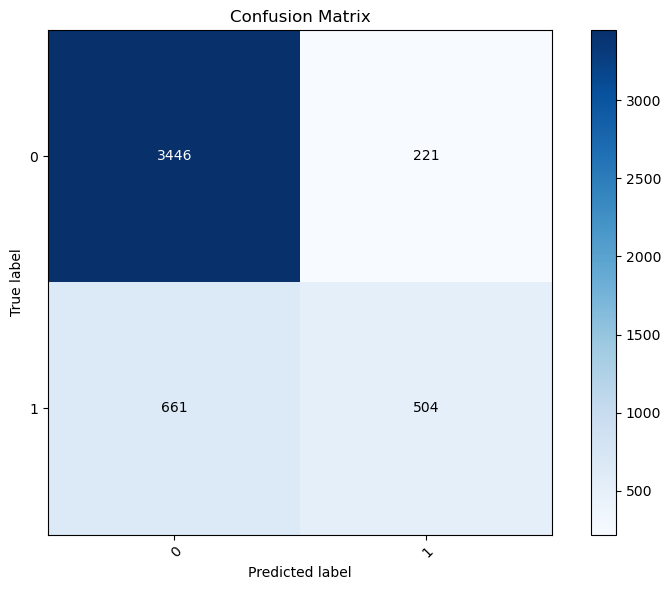


--- Scikit-learn Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3667
           1       0.70      0.43      0.53      1165

    accuracy                           0.82      4832
   macro avg       0.77      0.69      0.71      4832
weighted avg       0.80      0.82      0.80      4832



In [30]:
#Plotting the confusion matrix for the log loss prediction
print("\n--- Scikit-learn Confusion Matrix ---")
cm = confusion_matrix(y_test, sk_y_pred_ada_ll)
plot_confusion_matrix(cm, y_test)
print("\n--- Scikit-learn Classification Report ---")
print(classification_report(y_test, sk_y_pred_ada_ll))

In [31]:
#Generate predictions for the validation set based on the sk_y_pred_ada_ll results
df_valid_processed = preprocess_data(df_valid)
df_valid_transformed = scaler.transform(df_valid_processed)
results = sk_ada_ll.predict(df_valid_transformed)

# Save Results to CSV file
pd.Series(results).to_csv('Group_1_Adaline_PredictedOutputs.csv', index=False)

c:\Users\strou\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
